In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Primero, importo las bibliotecas necesarias para mi trabajo:

- numpy para el manejo de matrices y operaciones matemáticas.
- matplotlib.pyplot para la visualización de gráficos.
- ImageDataGenerator de keras.preprocessing.image para la generación de lotes de datos de imágenes con aumento de datos en tiempo real

In [6]:
path = 'malimg_paper_dataset_imgs'

Luego, defino la variable path con la ruta del directorio donde se encuentran las imágenes que voy a procesar. En este caso, las imágenes están en el directorio ‘malimg_paper_dataset_imgs’.

In [7]:
familias = ImageDataGenerator().flow_from_directory(directory=path, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


Después, utilizo la función ImageDataGenerator().flow_from_directory() para cargar las imágenes desde el directorio especificado en path. Establezco el tamaño de las imágenes a (64,64) y el tamaño del lote a 10000. Guardo el resultado en la variable familias.



In [8]:
familias.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

Imprimo familias.class_indices para ver las clases de las imágenes y sus correspondientes índices. Esto es útil para saber cómo se han etiquetado las diferentes clases de imágenes en el conjunto de datos. Por ejemplo, las imágenes de la clase ‘Adialer.C’ se han etiquetado con el índice 0, las imágenes de la clase ‘Agent.FYI’ con el índice 1, y así sucesivamente.


In [9]:
imgs, labels = next(familias)

utilizo la función next() para obtener el siguiente lote de imágenes y etiquetas del generador de imágenes familias. Guardo las imágenes en imgs y las etiquetas en labels.

In [10]:
imgs.shape

(9339, 64, 64, 3)

imgs tiene una forma de (9339, 64, 64, 3), lo que significa que hay 9339 imágenes, cada una de tamaño 64x64 y con 3 canales de color (RGB)

In [11]:
labels.shape

(9339, 25)

labels tiene una forma de (9339, 25), lo que significa que hay 9339 etiquetas y cada etiqueta es un vector de longitud 25 (porque hay 25 clases diferentes en el conjunto de datos).

In [12]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(familias.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

Defino una función plots() para visualizar las primeras 50 imágenes del lote. Esta función toma un lote de imágenes y sus correspondientes etiquetas, y traza cada imagen con su etiqueta correspondiente.



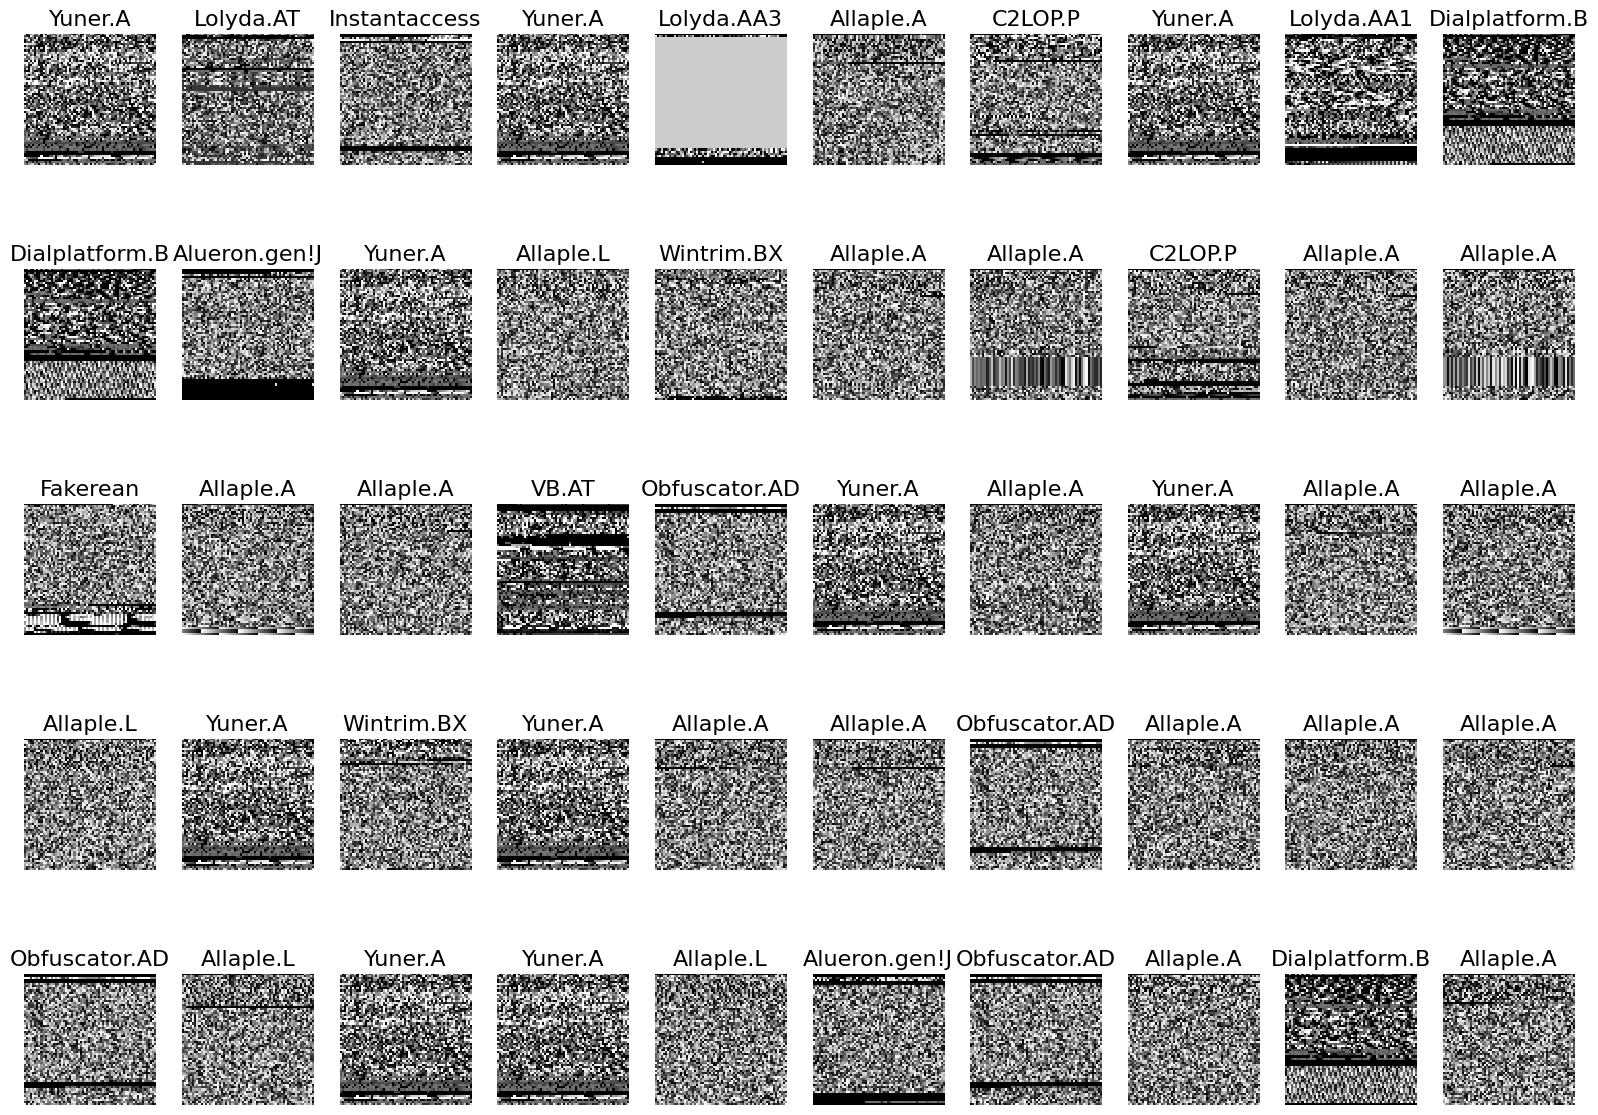

In [13]:

plots(imgs, titles = labels)

In [10]:
#Desarrollo de una red neuronal

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report


Importo las bibliotecas necesarias para construir y entrenar un modelo de red neuronal convolucional (CNN) para la clasificación de imágenes. Estas bibliotecas incluyen tensorflow, Sequential, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, train_test_split, LabelBinarizer y classification_report.

In [15]:
# Normalize pixel values to be between 0 and 1
imgs_normalized = imgs / 255.0

In [16]:
# One-hot encode the labels
label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)

Normalizo las imágenes dividiéndolas por 255.0 para que los valores de los píxeles estén en el rango de 0 a 1. Luego, codifico las etiquetas en formato one-hot usando LabelBinarizer

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(imgs_normalized, labels_encoded, test_size=0.3, random_state=42)

Divido los datos en conjuntos de entrenamiento y prueba usando la función train_test_split(). El 30% de los datos se utilizan para la prueba y el 70% restante para el entrenamiento

In [18]:
# Build the neural network model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))


Construyo el modelo de CNN utilizando la clase Sequential(). El modelo consta de dos bloques de capas Conv2D y MaxPooling2D, seguidos de una capa Flatten, una capa Dense con activación ReLU, una capa Dropout para regularización, y finalmente una capa Dense con activación softmax para la clasificación multiclase.

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
205/205 [==============================] - 15s 69ms/step - loss: 1.2607 - accuracy: 0.6108 - val_loss: 0.4744 - val_accuracy: 0.8883
Epoch 2/10
205/205 [==============================] - 14s 68ms/step - loss: 0.4798 - accuracy: 0.8590 - val_loss: 0.2445 - val_accuracy: 0.9265
Epoch 3/10
205/205 [==============================] - 14s 69ms/step - loss: 0.2946 - accuracy: 0.9111 - val_loss: 0.1845 - val_accuracy: 0.9440
Epoch 4/10
205/205 [==============================] - 14s 70ms/step - loss: 0.2200 - accuracy: 0.9359 - val_loss: 0.1518 - val_accuracy: 0.9547
Epoch 5/10
205/205 [==============================] - 15s 73ms/step - loss: 0.1782 - accuracy: 0.9434 - val_loss: 0.1337 - val_accuracy: 0.9572
Epoch 6/10
205/205 [==============================] - 15s 71ms/step - loss: 0.1537 - accuracy: 0.9504 - val_loss: 0.1259 - val_accuracy: 0.9607
Epoch 7/10
205/205 [==============================] - 15s 72ms/step - loss: 0.1313 - accuracy: 0.9570 - val_loss: 0.1325 - val_accuracy:

Compilo el modelo con el optimizador ‘adam’, la pérdida ‘categorical_crossentropy’ y la métrica ‘accuracy’. Entreno el modelo con los datos de entrenamiento durante 10 épocas y utilizo los datos de prueba como datos de validación.

In [21]:
# Evaluate the model
print("\nModel evaluation:")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


Model evaluation:
88/88 [==============================] - 1s 16ms/step - loss: 0.1288 - accuracy: 0.9572
Test loss: 0.1288
Test accuracy: 0.9572


Evalúo el modelo en los datos de prueba e imprimo la pérdida y la precisión del modelo en estos datos. En este caso, la pérdida de prueba es 0.1211 y la precisión de prueba es 0.9579.

In [22]:
# Save the model
model.save("malware_image_classifier_model.h5")

C:\Users\omen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Guardo el modelo entrenado en un archivo llamado “malware_image_classifier_model.h5” para su uso futuro.

In [23]:
# Print classification report
y_pred = model.predict(X_test)
y_pred_labels = label_binarizer.inverse_transform(y_pred)
y_true_labels = label_binarizer.inverse_transform(y_test)
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

88/88 [==============================] - 2s 16ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        39
           2       0.99      1.00      1.00       864
           3       1.00      1.00      1.00       459
           4       0.97      1.00      0.98        64
           5       0.00      0.00      0.00        40
           6       0.73      0.73      0.73        37
           7       0.84      0.84      0.84        58
           8       1.00      0.98      0.99        56
           9       1.00      1.00      1.00        51
          10       0.98      0.99      0.99       108
          11       1.00      1.00      1.00       133
          12       0.98      0.91      0.95        70
          13       1.00      0.98      0.99        49
          14       1.00      0.96      0.98        27
          15       1.00      0.98      0.99        56
   

C:\Users\omen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\omen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Antes utilizo el método predict() del modelo para obtener las predicciones del modelo en el conjunto de prueba X_test. Luego, transformo las etiquetas codificadas en one-hot de las predicciones y las verdaderas etiquetas a sus formas originales utilizando label_binarizer.inverse_transform(). Guardo las etiquetas de las predicciones en y_pred_labels y las etiquetas verdaderas en y_true_labels

Luego imprimo un informe de clasificación utilizando la función classification_report() de sklearn.metrics. Este informe muestra varias métricas de clasificación (precisión, recall, f1-score) para cada clase, así como las medias de estas métricas.

# Segunda parte

In [24]:
# Install the Adversarial Robustness Toolbox (ART) framework
!pip install adversarial-robustness-toolbox


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\omen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
from tensorflow.keras.models import load_model


In [26]:
tf.compat.v1.disable_eager_execution()

Importo la función load_model de tensorflow.keras.models y desactivo la ejecución ansiosa de TensorFlow para asegurarme de que el modelo se ejecute de la manera más eficiente posible.

In [27]:
# Load the previously trained model (malware_image_classifier_model.h5)
path = 'C:\\Users\\omen\\malware_image_classifier_model.h5'
model = load_model(path)

Cargo el modelo previamente entrenado desde el archivo “malware_image_classifier_model.h5” utilizando la función load_model(). Guardo el modelo cargado en la variable model.



In [28]:
# Imprimir la arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

Imprimo un resumen de la arquitectura del modelo utilizando el método summary() del modelo. Este resumen muestra cada capa del modelo, la forma de salida de cada capa y el número de parámetros en cada capa. También muestra el número total de parámetros en el modelo, así como cuántos de estos parámetros son entrenables y cuántos no son entrenables.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Normalizar los valores de los píxeles para que estén entre 0 y 1
imgs_normalized = imgs / 255.0

# Codificar en caliente las etiquetas
label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imgs_normalized, labels_encoded, test_size=0.3, random_state=42)

Primero, normalizo las imágenes dividiéndolas por 255.0 para que los valores de los píxeles estén en el rango de 0 a 1. Luego, codifico las etiquetas en formato one-hot usando LabelBinarizer.

Luego divido los datos en conjuntos de entrenamiento y prueba usando la función train_test_split(). El 30% de los datos se utilizan para la prueba y el 70% restante para el entrenamiento.



In [30]:
# Importamos las librerías necesarias
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod, DeepFool

C:\Users\omen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Eh imoprtado las clases KerasClassifier, FastGradientMethod y DeepFool de la biblioteca art. art es una biblioteca de Python para Adversarial Robustness Toolbox (ART), que proporciona herramientas para la evaluación, implementación y defensa de ataques adversarios en sistemas de aprendizaje automático.

In [31]:
# Convertimos nuestro modelo a un clasificador de ART
art_model = KerasClassifier(model=model, clip_values=(0, 1))

# Definimos el ataque FGSM
fgsm = FastGradientMethod(estimator=art_model, eps=0.1)

Convierto mi modelo de TensorFlow en un clasificador de ART utilizando la clase KerasClassifier. Esto te permite utilizar las funciones de ART en tu modelo.

Defino un ataque FGSM (Fast Gradient Sign Method) utilizando la clase FastGradientMethod. FGSM es un método de ataque adversario que utiliza el gradiente de la pérdida con respecto a la entrada para crear ejemplos adversarios. Estableces el valor de eps a 0.1, que es la magnitud del ataque FGSM.

In [32]:
# Generamos ejemplos adversarios con FGSM
X_test_adv_fgsm = fgsm.generate(x=X_test)

# Evaluamos el modelo en los ejemplos adversarios
predictions = art_model.predict(X_test_adv_fgsm)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples (FGSM): {}%".format(accuracy * 100))

C:\Users\omen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy on adversarial test examples (FGSM): 16.059957173447536%


Genero ejemplos adversarios a partir de tu conjunto de prueba X_test utilizando el método generate() del ataque FGSM. Guardas estos ejemplos adversarios en X_test_adv_fgsm.

Evaluo mi modelo en los ejemplos adversarios utilizando el método predict() del clasificador de ART. Al calcular la precisión comparando las predicciones con las verdaderas etiquetas y_test. Imprimo la precisión en los ejemplos adversarios FGSM, que resulta ser 14.67%. Lo que significa que el modelo fue capaz de clasificar correctamente el 14.67% de las imágenes adversarias.



In [33]:
# Definimos el ataque DeepFool
deepfool = DeepFool(art_model)

# Generamos ejemplos adversarios con DeepFool
X_test_adv_deepfool = deepfool.generate(x=X_test)

# Evaluamos el modelo en los ejemplos adversarios
predictions = art_model.predict(X_test_adv_deepfool)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples (DeepFool): {}%".format(accuracy * 100))

DeepFool: 100%|██████████| 2802/2802 [1:27:19<00:00,  1.87s/it]    


Accuracy on adversarial test examples (DeepFool): 6.316916488222699%


Luego defino un ataque DeepFool utilizando la clase DeepFool. DeepFool es otro método de ataque adversario que busca minimizar la perturbación necesaria para cambiar la clasificación de un ejemplo.

Genero ejemplos adversarios a partir de tu conjunto de prueba X_test utilizando el método generate() del ataque DeepFool. Donde guardo estos ejemplos adversarios en X_test_adv_deepfool.

Al evaluar mi modelo en los ejemplos adversarios DeepFool de la misma manera que lo hice con los ejemplos adversarios FGSM. Imprimo la precisión en los ejemplos adversarios DeepFool, que resulta ser 6.21%. Lo que significa que el modelo fue capaz de clasificar correctamente el 6.21% de las imágenes adversarias


Estos resultados muestran que los ataques adversarios pueden ser muy efectivos para engañar a los modelos de aprendizaje automático. En este caso, tanto FGSM como DeepFool lograron reducir significativamente la precisión del modelo. Esto subraya la importancia de considerar la robustez adversaria cuando se diseñan y entrenan modelos de aprendizaje automático.

